# HAND WRITTEN DIGIT CLASSIFICATION

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [42]:
# Loading the dataset, and storing it in variables.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [49]:
print(f"x_train: {x_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test: {y_test.shape}")

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [3]:
# first sample looks like.
x_train[0] # it's 2D array, values in between (0 to 255). 0 = black, 255 = white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
len(x_train) # total samples in x_train.

60000

In [5]:
x_train.shape # total 60,000 samples, with resolution of 28*28 pixels

(60000, 28, 28)

In [6]:
x_train[0].shape # shape of first element

(28, 28)

In [7]:
x_train[0].size # the size is 784, indicates total pixels or resolution. (28*28=784)

784

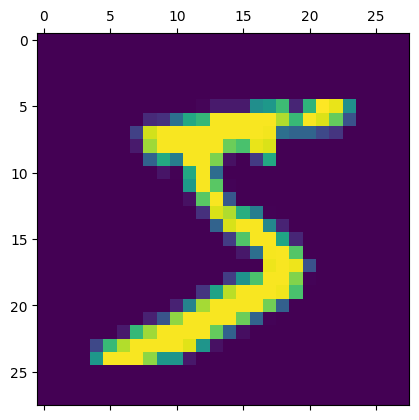

In [8]:
plt.matshow(x_train[0]) # ploting first sample

In [50]:
print(y_train.shape)

(60000,)


In [10]:
y_train[0] # output of the first sample

np.uint8(5)

In [11]:
y_train[:5] # output of first 5 samples

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
# we have to flatten the 2D array into 1D array.
x_train_flattened = x_train.reshape(len(x_train), 28*28) # use reshape func for flattening 2d into 1d array.
x_train_flattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [14]:
# we also have to flattened the test data.
x_test_flattened = x_test.reshape(len(x_test), 28*28)
x_test_flattened[0] # first sample look like

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [16]:
print(x_train.shape) # shape of data without flatening
print(x_train_flattened.shape) # shape of data with flattening

(60000, 28, 28)
(60000, 784)


In [17]:
# after flattening 1st sample look like
x_train_flattened[0] 

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Simple Model

In [65]:
# creating simple neural network.
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compiling the model.
model.compile(
    optimizer ='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# training the model.
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7728 - loss: 16.9489
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8801 - loss: 5.8773
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8803 - loss: 5.6611
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8869 - loss: 5.3443
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8913 - loss: 5.1866


# 2nd approach
### Using SCALE VALUES technique for improving Accuracy

In [19]:
# we can improve the accuracy with scaling the values of data, like in 0 to 1 form.
x_train_1 = x_train / 255
x_test_1 = x_test / 255

In [21]:
x_train_1[0] # now pixel values in each sample is from 0 to 1.

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
x_train_1.shape

(60000, 28, 28)

In [23]:
# flattening the training sample into 1d array
x_train_1_flattened = x_train_1.reshape(len(x_train_1), 28*28)
x_train_1_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
# also flattened x_test.
x_test_1_flattened = x_test_1.reshape(len(x_test_1), 28*28)

In [25]:
x_train_1_flattened.shape

(60000, 784)

### Model with SCALE VALUES technique

In [64]:
# creating model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile model
model.compile(
    optimizer ='adam',
    loss ='sparse_categorical_crossentropy',
    metrics =['accuracy']
)

# train the model
model.fit(x_train_1_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8145 - loss: 0.7178
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9144 - loss: 0.3121
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9223 - loss: 0.2815
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9235 - loss: 0.2710
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9259 - loss: 0.2671


In [27]:
# evaluating the trained model, with not scaled values(0 to 1)
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8955 - loss: 54.7806


[48.774742126464844, 0.9090999960899353]

In [28]:
# evaluate the model with scaled values(0 to 1)
model.evaluate(x_test_1_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9142 - loss: 0.3041


[0.26764288544654846, 0.9243000149726868]

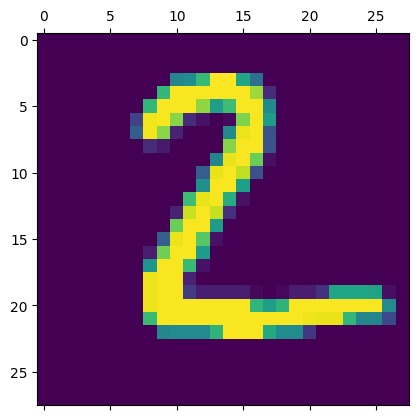

In [29]:
# lets check manually.
plt.matshow(x_test_1[1])

In [30]:
y_predicted = model.predict(x_test_1_flattened)
y_predicted[1]  # as our output has 10 neurons, so it shows 10 numbers, the greater number is our predication.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([4.4384471e-01, 5.8143921e-03, 9.9897200e-01, 2.8614053e-01,
       4.2617465e-10, 7.4451721e-01, 8.5968840e-01, 8.3230211e-13,
       1.1918430e-01, 1.8651327e-09], dtype=float32)

In [31]:
np.argmax(y_predicted[1]) # argmax() just prints the index of max value.

np.int64(2)

### Confusion Matrix

In [32]:
print(y_test[:5])
print(20*('*'))
print(y_predicted[0]) # these are deciaml values,we have to convert it into whole numbers "and just keep index of max value"

[7 2 1 0 4]
********************
[2.1554463e-02 2.2163026e-07 4.2800769e-02 9.5819712e-01 2.1513014e-03
 1.0557758e-01 2.1654316e-06 9.9982506e-01 8.0300048e-02 6.5757030e-01]


In [33]:
y_predicted_labels = [np.argmax(i) for i in y_predicted] # we can extract index of max value.
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [34]:
# making the confusion matrix.
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    4,    5,    3,    1,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   7,   10,  917,   20,   10,    3,   13,   12,   37,    3],
       [   3,    0,   17,  929,    0,   15,    2,   13,   23,    8],
       [   1,    1,    4,    1,  914,    0,   11,    4,   10,   36],
       [  10,    1,    3,   46,   10,  749,   19,    8,   39,    7],
       [  14,    3,    7,    1,    7,    7,  914,    2,    3,    0],
       [   1,    5,   21,    7,    5,    0,    0,  960,    3,   26],
       [   8,    7,    7,   22,    9,   20,    9,   13,  873,    6],
       [  11,    7,    1,   10,   26,    5,    0,   32,    4,  913]],
      dtype=int32)>

### Visualization of confusion matrix

Text(95.72222222222221, 0.5, 'Truth')

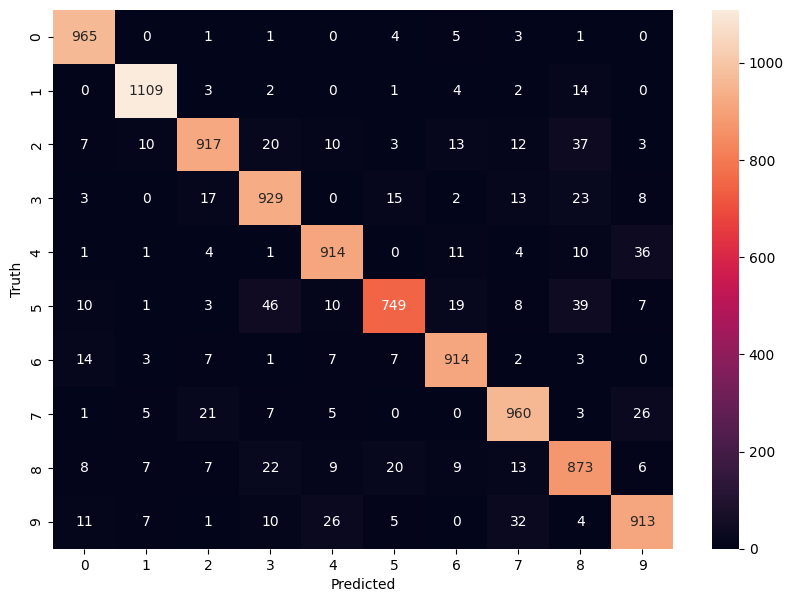

In [35]:
# visualize the above confusion matrix
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# approach 3
### Adding Hidden Layers to Model

In [69]:
# creating model.
model = tf.keras.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# compiling model.
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train_1_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8818 - loss: 0.4228
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9647 - loss: 0.1159
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9767 - loss: 0.0780
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9831 - loss: 0.0564
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9878 - loss: 0.0430


In [70]:
model.evaluate(x_test_1_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.0868


[0.07542216032743454, 0.977400004863739]

### Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

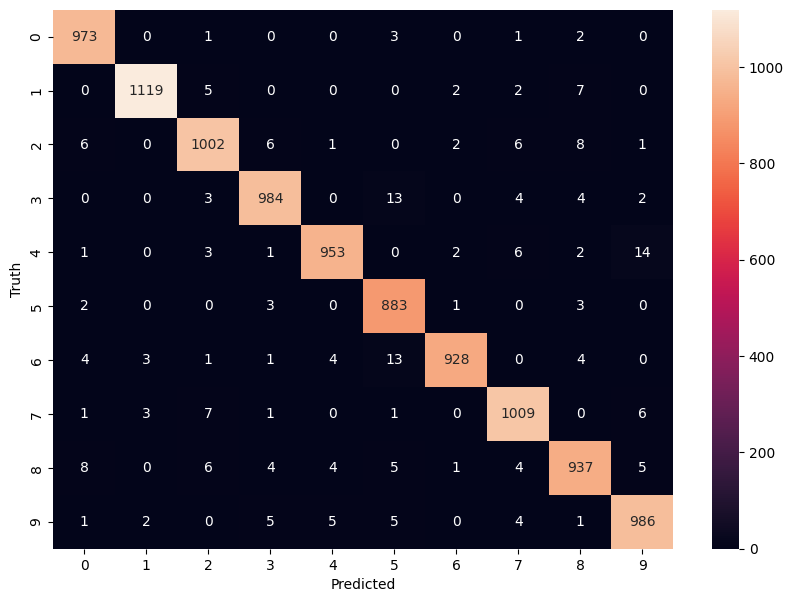

In [71]:
y_predicted = model.predict(x_test_1_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Use flattening technique in creating model stage 

In [60]:
# creating model.
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28,28)),
    tf.keras.layers.Flatten(),      # we can flatten the 2d array here, in creating model stage.
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
# compiling model.
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
# training the model.
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8144 - loss: 6.5795
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9120 - loss: 0.3740
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9297 - loss: 0.2897
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9393 - loss: 0.2374
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9451 - loss: 0.2172


### Summary
- load dataset and seperate it into x_train, y_train, x_test, y_test.
- check it's shape, if it's 2D array, then flattened it into 1D array.
- scaling technique. (converts the numbers in range 0 to 1).
- create the model, compile the model, train the model and evaluate the model.
- make confusion matrix.